In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import os
import pandas as pd

from load_data import BiopsyDataset, DATA_DIR, TRANSFORMS, P53_CLASS_NAMES
from resnet import ResNetModel, ResNetModelDoubleBinary

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
print("Device: {}".format(device))

C:\Users\321lu\AppData\Local\Temp\ipykernel_33788\11556024.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Device: cuda
Device: cuda


In [42]:
img_size = 1024
transform_arg = "basic_normalize"

train_transform = TRANSFORMS[transform_arg]
test_transform = None
if "normalize" in transform_arg:
    test_transform = TRANSFORMS["normalize"]

# Load the datasets
test_dataset = BiopsyDataset(root_dir=DATA_DIR, class_names=P53_CLASS_NAMES,
    size=img_size, labels_filename="test")
print("Test dataset size: ", len(test_dataset))

Class distribution:  {'Wildtype': 15, 'Overexpression': 15, 'Nullmutation': 15, 'Doubleclone': 15}
Loaded images from file
Test dataset size:  60


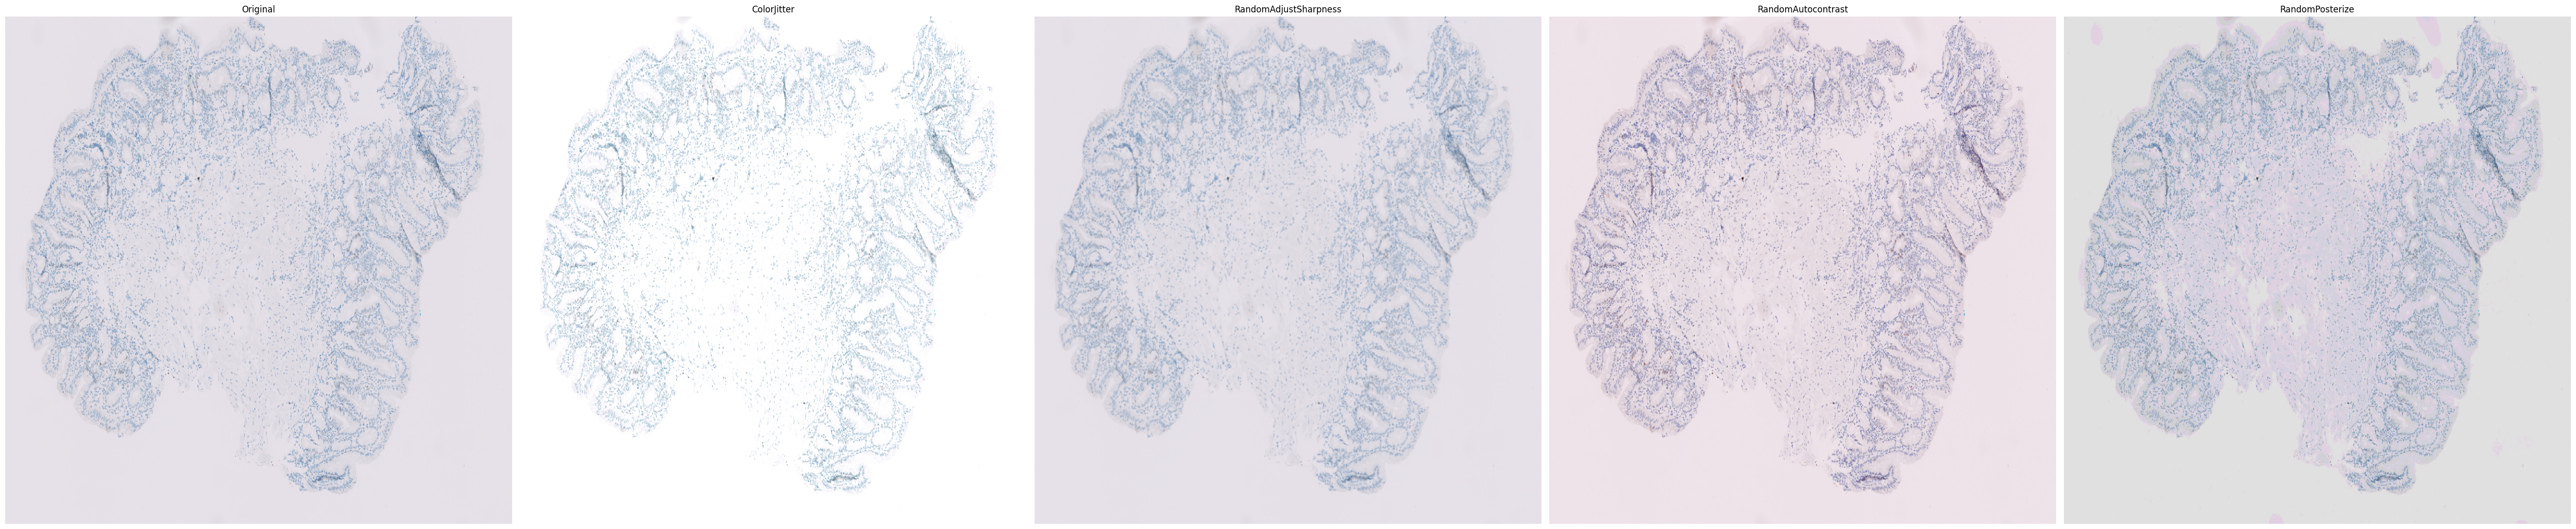

In [47]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the dataset and transforms
dataset = test_dataset  # Assuming you want to visualize transforms on the test dataset
# Transforms including necessary arguments
transform_functions = [
    # Color and brightness transforms
    transforms.Grayscale(num_output_channels=3),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    transforms.RandomAdjustSharpness(sharpness_factor=2),
    transforms.RandomAutocontrast(),
    transforms.RandomEqualize(),
    transforms.RandomPosterize(bits=4),
    transforms.RandomSolarize(threshold=128),
]
mild_transform_functions = [
    # Mild color and brightness transforms
    # transforms.Grayscale(num_output_channels=3), # included as saturation in ColorJitter
    transforms.ColorJitter(brightness=0.2, contrast=0.5, saturation=0.5, hue=0.05),
    transforms.RandomAdjustSharpness(sharpness_factor=0, p=1), # Adjusts sharpness of the image (1.0 is the original image, 2.0 is very sharp, 0.0 is blurry)
    transforms.RandomAutocontrast(p=1), # Makes lightest pixels white and darkest pixels black
    # transforms.RandomEqualize(),
    transforms.RandomPosterize(bits=4, p=1),
    # transforms.RandomSolarize(threshold=192),
]

# Apply transforms and visualize the images
fig, axs = plt.subplots(1, len(mild_transform_functions)+1, figsize=(50, 25))
# Plot original and transformed images side by side
original_image, _ = dataset[0]
axs[0].imshow(original_image.permute(1, 2, 0))
axs[0].set_title('Original')
axs[0].axis('off')
for i, transform in enumerate(mild_transform_functions):
    name = transform.__class__.__name__
    # Make PIL image first
    transform = transforms.Compose([
        transforms.ToPILImage(), 
        transform, transforms.ToTensor()])

    # Get transformed images
    transformed_image = transform(original_image)

    # Plot original and transformed images side by side
    axs[i+1].imshow(transformed_image.permute(1, 2, 0))
    axs[i+1].set_title(name)
    axs[i+1].axis('off')

plt.tight_layout()
plt.show()